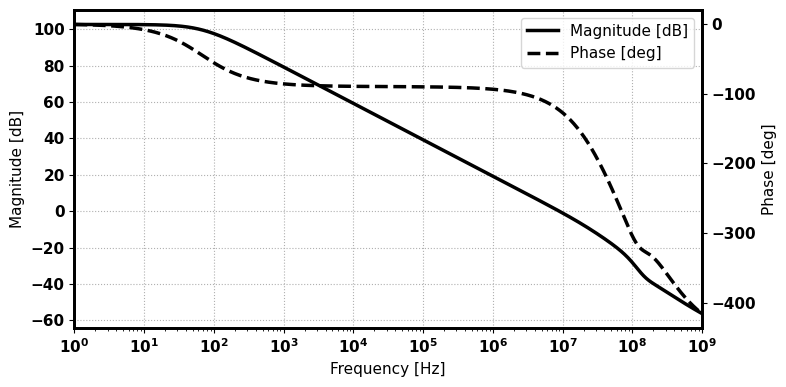

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl

# Border width
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['font.weight'] = 'bold'
legend_properties = {'weight':'regular'}
mpl.rcParams['font.size'] = 11

dir = "report_data"
filename = "fd_ac.csv"
data = pd.read_csv(os.path.join(dir, filename))

# set theme and figure size
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
# fig.set_dpi(100)

freq = data["DM Phase Plot X"]
mag = data["DM Gain Plot Y"]
phase = data["DM Phase Plot Y"]
titles = ["$OL Gain$", "OL Phase"]

lns1 = ax.semilogx(freq, mag, linewidth = 2.5, color="black", label="Magnitude [dB]")
ax2  = ax.twinx()
lns2 = ax2.semilogx(freq, phase, linewidth = 2.5, linestyle='--', color="black", label="Phase [deg]")

lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0, prop=legend_properties)

def generate_log_scale(decades):
    scale = []
    for i in range(0, decades):
        scale.append(10**i)
    return scale

ax.grid(linestyle='dotted')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Magnitude [dB]')
ax2.set_ylabel('Phase [deg]')

plt.xlim(1, 1e9)
fig.tight_layout()
# plt.title('Three Mirror OTA AC Analysis')
plt.xticks(generate_log_scale(10))

filename = "twostage_lp_ac.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = False
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)

([<matplotlib.axis.XTick at 0x25b2e2a75f0>,
 [Text(1, 0, '$\\mathdefault{10^{0}}$'),
  Text(10, 0, '$\\mathdefault{10^{1}}$'),
  Text(100, 0, '$\\mathdefault{10^{2}}$'),
  Text(1000, 0, '$\\mathdefault{10^{3}}$'),
  Text(10000, 0, '$\\mathdefault{10^{4}}$'),
  Text(100000, 0, '$\\mathdefault{10^{5}}$'),
  Text(1000000, 0, '$\\mathdefault{10^{6}}$'),
  Text(10000000, 0, '$\\mathdefault{10^{7}}$'),
  Text(100000000, 0, '$\\mathdefault{10^{8}}$')])

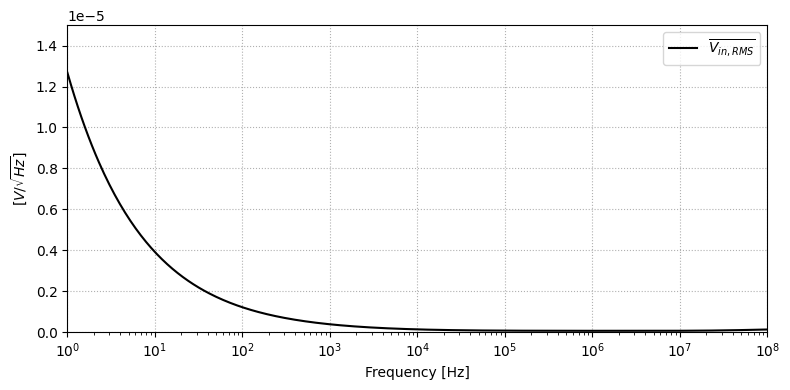

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.ticker

dir = "report_data"
filename = "fd_noise.csv"
data = pd.read_csv(os.path.join(dir, filename))

# set theme and figure size
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
# fig.set_dpi(100)

freq = data.filter(like="X")
noise = data.filter(like="Y")

ax.semilogx(freq, noise, color="black", label="$\\overline{V_{in,RMS}}$")

ax.legend()
ax.grid(linestyle='dotted')

def generate_log_scale(decades):
    scale = []
    for i in range(0, decades):
        scale.append(10**i)
    return scale

ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel("$[V/\\sqrt{Hz}]$")
plt.xlim(1, 1e5)
plt.ylim(0, 15e-6)
fig.tight_layout()
plt.xticks(generate_log_scale(9))

filename = "twostage_lp_noise.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = False
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)

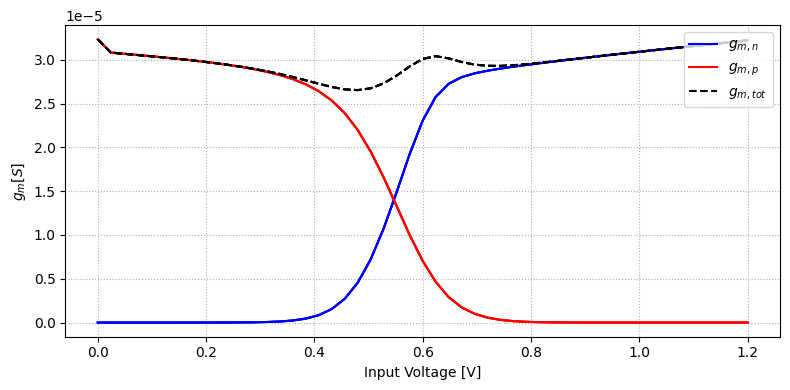

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc="upper right")

dir = "report_data"
filename = "fd_gm.csv"
data = pd.read_csv(os.path.join(dir, filename))

# set theme and figure size
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
# fig.set_dpi(100)

v       = data.filter(like="X").to_numpy()
gm      = data.filter(like="Y")
gm_n    = gm.filter(like="n_gm").to_numpy()
gm_p    = gm.filter(like="p_gm")
gm_tot  = gm.filter(like="gm_combined")

ax.plot(v, gm_n, color="blue",      linestyle="solid", label="$g_{m,n}$")
ax.plot(v, gm_p, color="red",       linestyle="solid", label="$g_{m,p}$")
ax.plot(v, gm_tot, color="black",   linestyle="dashed", label="$g_{m,tot}$")

legend_without_duplicate_labels(ax)
ax.grid(linestyle='dotted')

ax.set_xlabel('Input Voltage [V]')
ax.set_ylabel("$g_m [S]$")
fig.tight_layout()

filename = "fd_gm.pdf"
path = os.path.join("../report/imgs", filename)
overwrite = False
if not os.path.isfile(path) or overwrite:
    print("Saving to", path)
    plt.savefig(path)